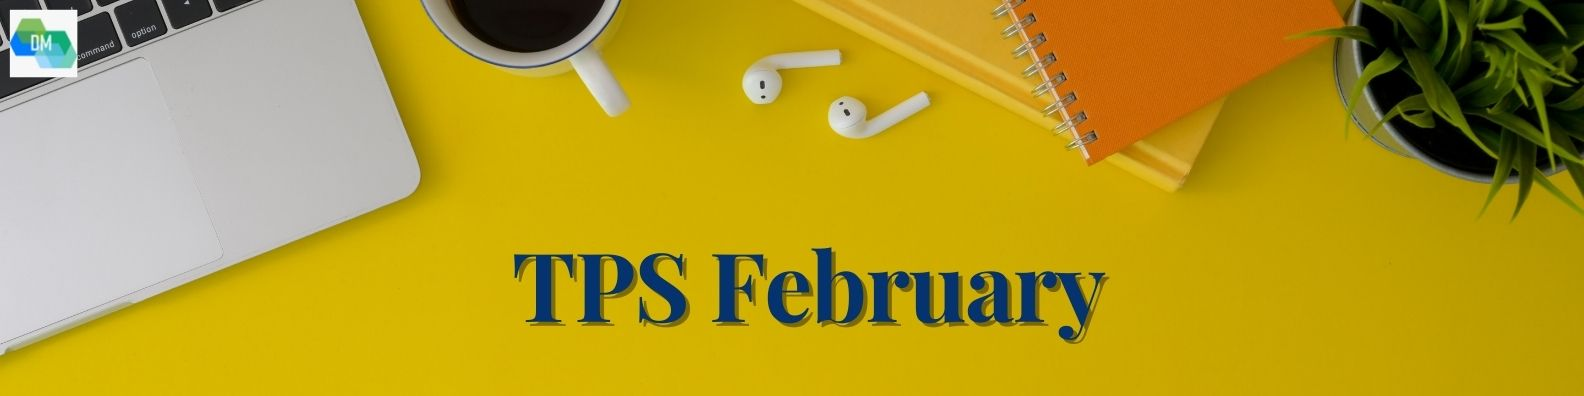

**Observations on this TPS dataset:**
- `target` column is the target variable which consists of 10 kinds of bacteria `Streptococcus_pyogenes`,`Salmonella_enterica`,`Enterococcus_hirae`,
`Escherichia_coli`,`Campylobacter_jejuni`,`Streptococcus_pneumoniae`,
`Staphylococcus_aureus`,`Escherichia_fergusonii`,`Bacteroides_fragilis`,`Klebsiella_pneumoniae`

- `Train` dataset has `200,000` rows and `288` columns which contains`286` features, `1` target variable `target` and `1` column of `row_id`
- `Test` dataset has `100,000` rows and `287` columns which contains`286` features with`1` column of `row_id`
- No missing values in train and test dataset

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from scipy.stats import mode
import warnings
warnings.filterwarnings('ignore')
from time import time
t0 = time()
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [2]:
df_train = pd.read_csv("../input/tabular-playground-series-feb-2022/train.csv")
df_test = pd.read_csv("../input/tabular-playground-series-feb-2022/test.csv")
df_subm = pd.read_csv("../input/tabular-playground-series-feb-2022/sample_submission.csv")

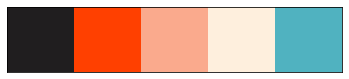

In [3]:
#Custom Color Palette 🎨
custom_colors = ["#201E1F","#FF4000","#FAAA8D","#FEEFDD","#50B2C0"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [4]:
df_train_row_count, df_train_column_count = df_train.shape
print('Total number of rows:', df_train_row_count)
print('Total number of columns:', df_train_column_count)

Total number of rows: 200000
Total number of columns: 288


In [5]:
df_test_row_count, df_test_column_count = df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count)

Total number of rows: 100000
Total number of columns: 287


In [6]:
df_train.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,200000.0,9.999950e+04,57735.171256,0.000000e+00,4.999975e+04,9.999950e+04,1.499992e+05,199999.000000
A0T0G0C10,200000.0,6.421457e-07,0.000087,-9.536743e-07,-9.536743e-07,-9.536743e-07,-9.536743e-07,0.009999
A0T0G1C9,200000.0,-3.076578e-06,0.000132,-9.536743e-06,-9.536743e-06,-9.536743e-06,-2.536743e-06,0.009990
A0T0G2C8,200000.0,-1.429921e-05,0.000287,-4.291534e-05,-4.291534e-05,-4.291534e-05,-1.291534e-05,0.009957
A0T0G3C7,200000.0,-9.734323e-06,0.000436,-1.144409e-04,-1.144409e-04,-1.144409e-04,-4.440918e-06,0.009886
...,...,...,...,...,...,...,...,...
A8T2G0C0,200000.0,3.792137e-04,0.001182,-4.291534e-05,-4.291534e-05,4.308466e-05,3.650847e-04,0.019957
A9T0G0C1,200000.0,6.172008e-05,0.000466,-9.536743e-06,-9.536743e-06,-9.536743e-06,3.046326e-05,0.009990
A9T0G1C0,200000.0,8.982134e-05,0.000548,-9.536743e-06,-9.536743e-06,4.632568e-07,6.046326e-05,0.009990
A9T1G0C0,200000.0,1.170014e-04,0.000679,-9.536743e-06,-9.536743e-06,4.632568e-07,6.946326e-05,0.019990


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 288 entries, row_id to target
dtypes: float64(286), int64(1), object(1)
memory usage: 439.5+ MB


In [9]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,100000.0,2.499995e+05,28867.657797,2.000000e+05,2.249998e+05,2.499995e+05,2.749992e+05,299999.000000
A0T0G0C10,100000.0,6.635157e-07,0.000075,-9.536743e-07,-9.536743e-07,-9.536743e-07,-9.536743e-07,0.009999
A0T0G1C9,100000.0,-2.069683e-06,0.000158,-9.536743e-06,-9.536743e-06,-9.536743e-06,-1.536743e-06,0.009990
A0T0G2C8,100000.0,-1.670571e-05,0.000254,-4.291534e-05,-4.291534e-05,-4.291534e-05,-1.291534e-05,0.009957
A0T0G3C7,100000.0,-9.132418e-06,0.000443,-1.144409e-04,-1.144409e-04,-1.144409e-04,-4.440918e-06,0.009886
...,...,...,...,...,...,...,...,...
A8T2G0C0,100000.0,3.918431e-04,0.001200,-4.291534e-05,-4.291534e-05,4.608466e-05,3.670847e-04,0.019957
A9T0G0C1,100000.0,6.034977e-05,0.000444,-9.536743e-06,-9.536743e-06,-9.536743e-06,3.146326e-05,0.009990
A9T0G1C0,100000.0,9.343461e-05,0.000578,-9.536743e-06,-9.536743e-06,4.632568e-07,6.046326e-05,0.009990
A9T1G0C0,100000.0,1.198191e-04,0.000676,-9.536743e-06,-9.536743e-06,4.632568e-07,7.046326e-05,0.019990


<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [10]:
df_train.isna().sum()

row_id       0
A0T0G0C10    0
A0T0G1C9     0
A0T0G2C8     0
A0T0G3C7     0
            ..
A9T0G0C1     0
A9T0G1C0     0
A9T1G0C0     0
A10T0G0C0    0
target       0
Length: 288, dtype: int64

In [11]:
df_test.isna().sum()

row_id       0
A0T0G0C10    0
A0T0G1C9     0
A0T0G2C8     0
A0T0G3C7     0
            ..
A8T2G0C0     0
A9T0G0C1     0
A9T0G1C0     0
A9T1G0C0     0
A10T0G0C0    0
Length: 287, dtype: int64

In [12]:
print ("Unique values are:\n",df_train.nunique())

Unique values are:
 row_id       200000
A0T0G0C10        18
A0T0G1C9         23
A0T0G2C8        139
A0T0G3C7        683
              ...  
A9T0G0C1        354
A9T0G1C0        509
A9T1G0C0        515
A10T0G0C0        22
target           10
Length: 288, dtype: int64


In [13]:
target_class = pd.DataFrame({'count': df_train.target.value_counts(),
                             'percentage': df_train['target'].value_counts() / df_train.shape[0] * 100
})

In [14]:
target_class

,count,percentage
Bacteroides_fragilis,20139,10.0695
Streptococcus_pyogenes,20076,10.0380
Streptococcus_pneumoniae,20074,10.0370
Campylobacter_jejuni,20063,10.0315
Salmonella_enterica,20030,10.0150
Escherichia_coli,19958,9.9790
Enterococcus_hirae,19947,9.9735
Escherichia_fergusonii,19937,9.9685
Staphylococcus_aureus,19929,9.9645
Klebsiella_pneumoniae,19847,9.9235


In [15]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Pie(values = target_class['count'],labels = target_class.index,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo='label', 
                  showlegend = False,marker = dict(colors =["#201E1F","#FF4000","#FAAA8D","#FEEFDD","#50B2C0",
                                                            "#390099","#9e0059","#ff0054","#38B000","#ffbd00"]),
                  title = dict(text = 'Target Distribution'))  
fig.show()

In [16]:
# Dropping not necessary Id column
df_train.drop(columns ='row_id',inplace=True)
df_test.drop(columns ='row_id',inplace=True)

In [17]:
categorical = df_train.columns[df_train.dtypes == "object"].to_numpy()
numerical = df_train.columns[df_train.dtypes != "object"].to_numpy()

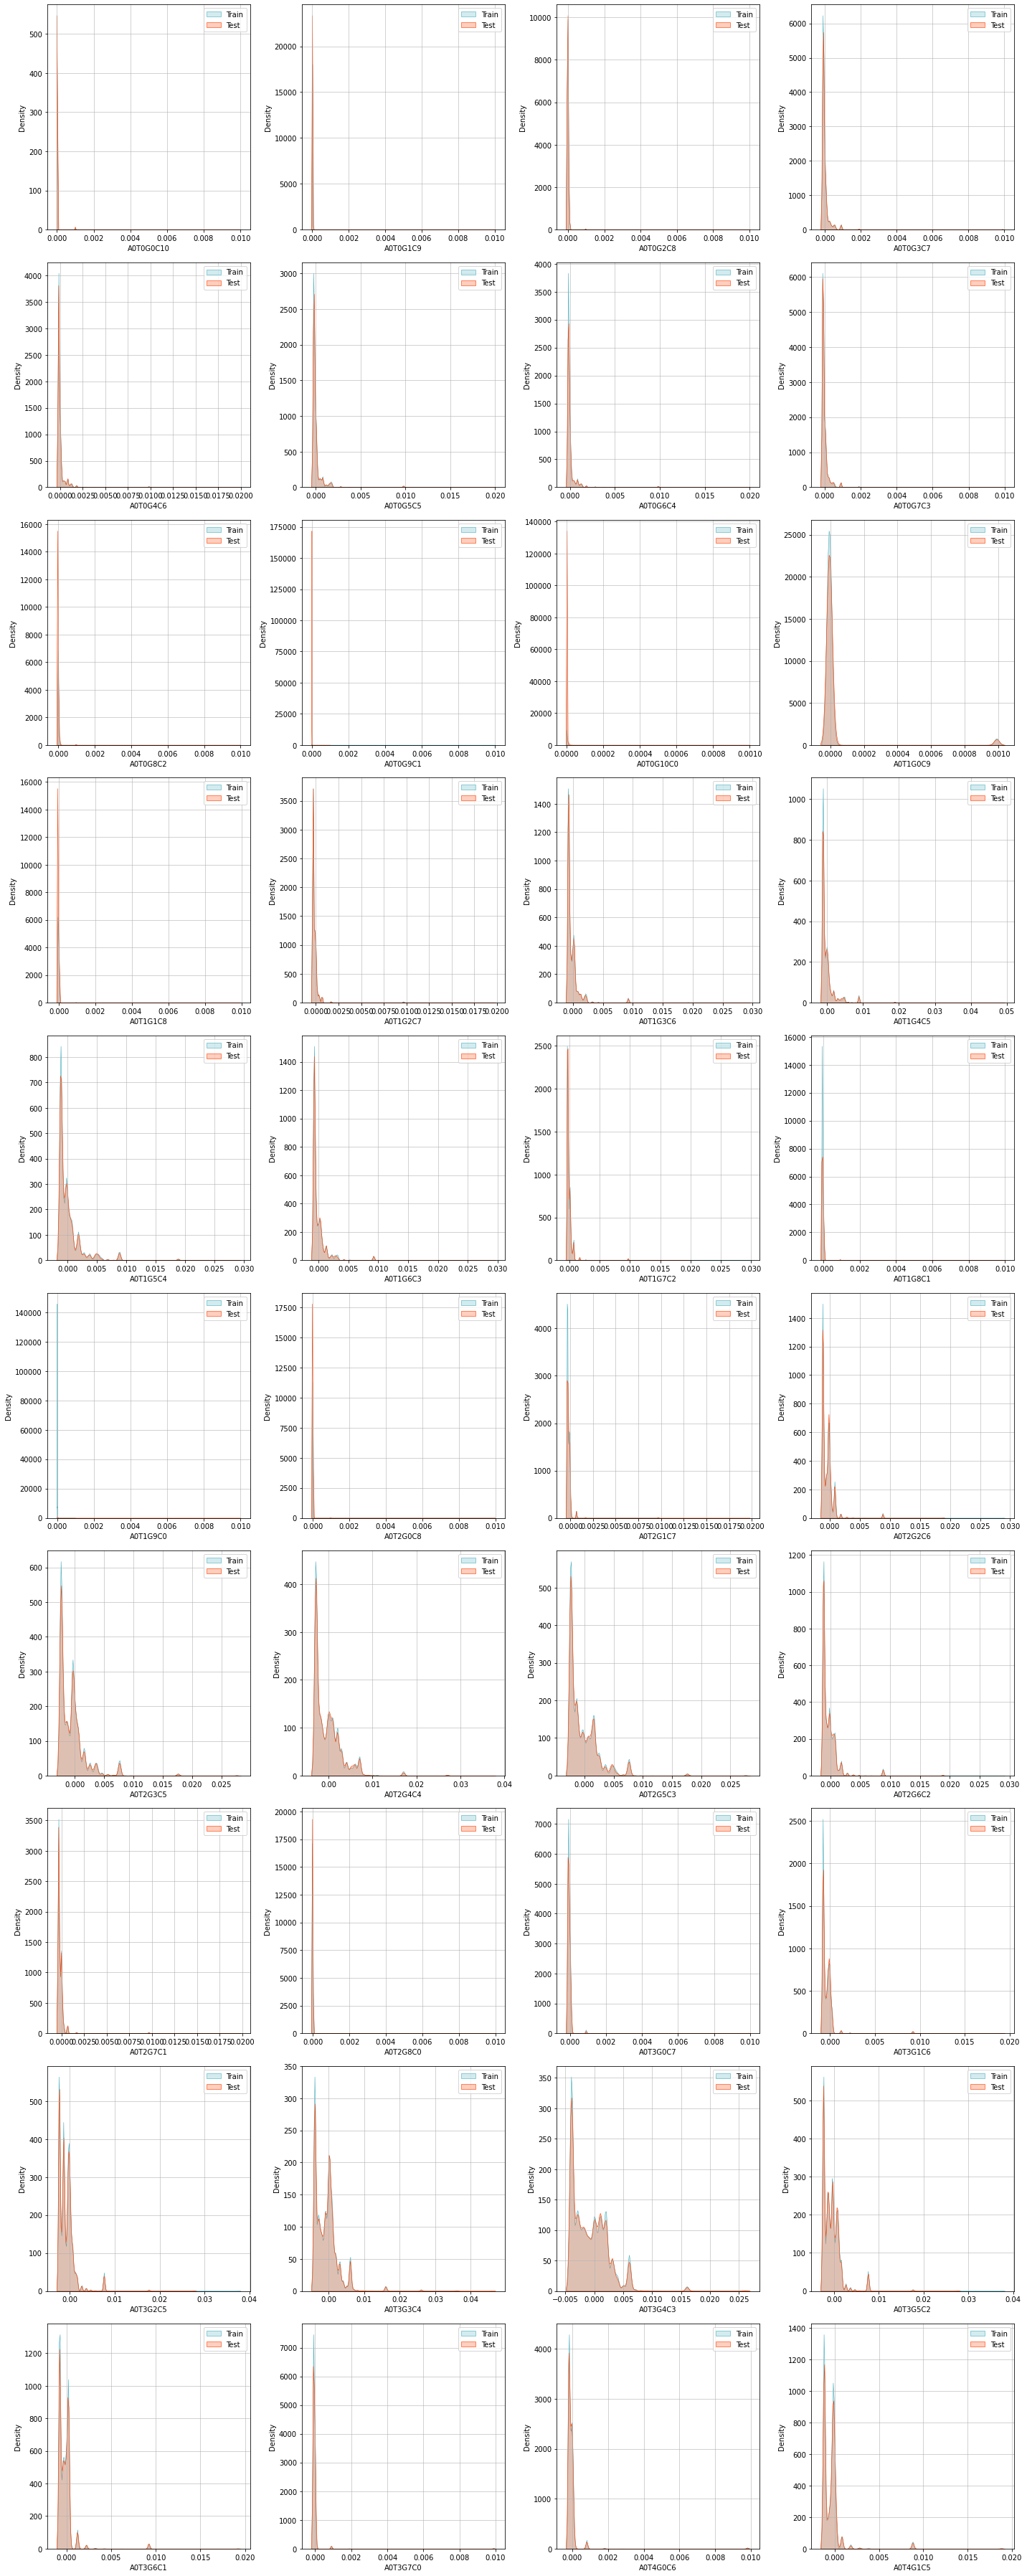

In [18]:
#Visualizing first few rows
fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 4
for idx, num in enumerate(numerical[:40]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ='#50B2C0',linewidth=0.6, data = df_train, label = "Train")
    sns.kdeplot(x = num, fill = True,color ='#FF4000',linewidth=0.6, data = df_test, label = "Test")      
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

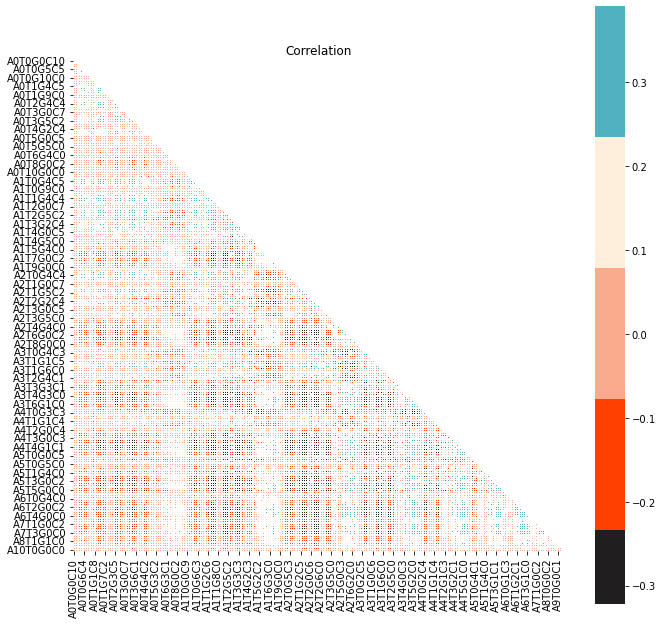

In [19]:
plt.figure(figsize = (11,11))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, cmap = custom_colors, robust = True, center = 0,square = True, linewidths =.6)
plt.title('Correlation')
plt.show()

In [20]:
#Defining X and y
X = df_train.drop(['target'], axis = 1)
y = df_train['target']

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Dataset split for prediction </centre></strong></h3>

In [21]:
# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (160000, 286)
y_train: (160000,)
X_test: (40000, 286)
y_test: (40000,)


In [22]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>XGBoost Classifier ✏️ </centre></strong></h3>

In [23]:
# 1. Using XGBoost Classifier
import xgboost as xgb
from xgboost import XGBClassifier
model1 = XGBClassifier(random_state = 42,n_estimators = 1000,learning_rate = 0.05,eval_metric ="auc",
                      max_depth = 8,booster ='gbtree',verbosity=0,tree_method = 'gpu_hist',task_type ="GPU")
model1.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=2,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, task_type='GPU', tree_method='gpu_hist',
              validate_parameters=1, ...)

In [24]:
predicted1 = model1.predict(X)

Confusion Matrix
[[20137     0     0     0     1     0     0     0     0     1]
 [    0 20063     0     0     0     0     0     0     0     0]
 [    0     0 19944     0     0     0     0     0     1     2]
 [    0     0     0 19957     0     0     1     0     0     0]
 [    0     0     0     0 19936     0     0     0     0     1]
 [    0     0     0     0     0 19847     0     0     0     0]
 [    0     0     0     0     0     0 20030     0     0     0]
 [    0     0     0     0     0     0     0 19929     0     0]
 [    0     1     0     0     0     0     0     1 20068     4]
 [    0     0     2     0     0     0     0     0     0 20074]]


Accuracy of XGBoost: 99.99 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20139
           1       1.00      1.00      1.00     20063
           2       1.00      1.00      1.00     19947
           3       1.00      1.00      1.00     19958
           4       1.00      1.00      1.00     19

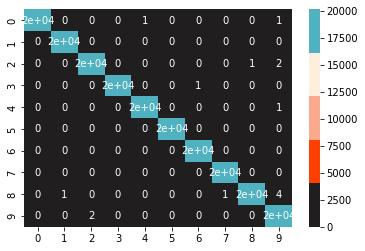

In [25]:
m1_cm = confusion_matrix(y, predicted1)
m1_acc_score = accuracy_score(y, predicted1)
print("Confusion Matrix")
print(m1_cm)
sns.heatmap(m1_cm, annot=True,cmap=custom_colors)
print("\n")
print("Accuracy of XGBoost:",round(m1_acc_score*100,2),'\n')
print(classification_report(y,predicted1))

In [26]:
y_pred1 = model1.predict(df_test)

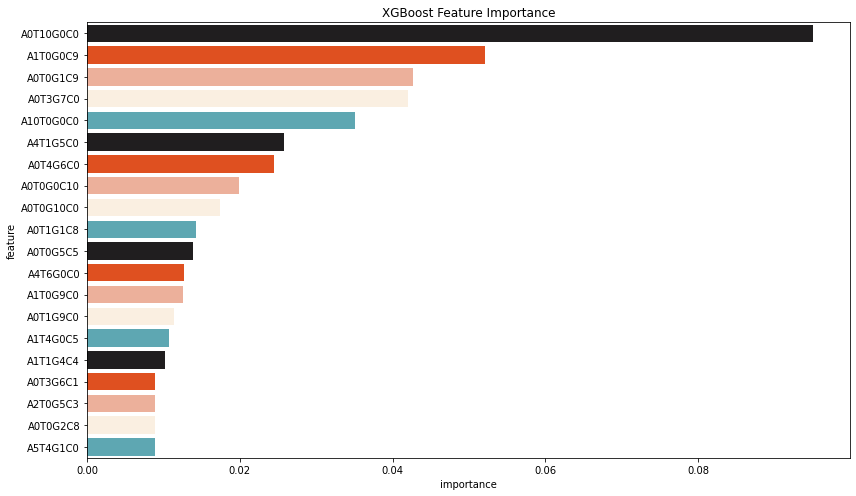

In [27]:
df_imp = pd.DataFrame({'feature': X_train.columns, 'importance': model1.feature_importances_})
plt.figure(figsize = (12,7))
sns.barplot(x="importance", y="feature", data = df_imp.sort_values(by ="importance", ascending = False).iloc[:20],
           palette = custom_colors)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [28]:
y_pred1 = enc.inverse_transform(y_pred1)
df_subm['target'] = y_pred1
df_subm.to_csv('submission_xgb.csv', index = False)

In [29]:
df_subm

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus
...,...,...
99995,299995,Streptococcus_pneumoniae
99996,299996,Bacteroides_fragilis
99997,299997,Bacteroides_fragilis
99998,299998,Bacteroides_fragilis


<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Random Forest Classifier ✏️ </centre></strong></h3>

Random Forest Classifier Accuracy: 99.47500000000001 %
Training time 438.44


<AxesSubplot:>

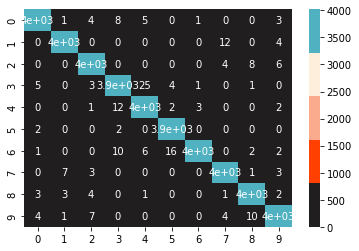

In [30]:
# 2. Using Random Forest Classifier
t0 = time()
# Load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
model2 = RandomForestClassifier(n_estimators = 500,n_jobs = -1, random_state = 42)

# Train the Classifier/fitting the model
model2.fit(X_train, y_train)

# predict the response
y_pred = model2.predict(X_test)
acc_rf = round(model2.score(X_test,y_test) * 100, 2)
rf_time = (round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', rf_time)

#Print Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot = True,cmap = custom_colors)

In [31]:
y_pred2 = model2.predict(df_test)

In [32]:
df_subm = df_subm.drop(["target"],axis = 1)

In [33]:
sub = pd.DataFrame(y_pred2,columns =["target"])

In [34]:
submission = pd.concat([df_subm,sub],axis = 1)
submission

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus
...,...,...
99995,299995,Streptococcus_pneumoniae
99996,299996,Bacteroides_fragilis
99997,299997,Bacteroides_fragilis
99998,299998,Bacteroides_fragilis


In [35]:
submission.to_csv("submission_rf.csv",index = False)

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Extra Trees Classifier ✏️ </centre></strong></h3>

Extra Trees Classifier Accuracy: 99.5775 %
Training time 1033.296


<AxesSubplot:>

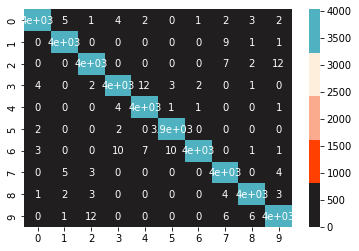

In [36]:
# 3. Using Extra Trees Classifier
t0 = time()
# Load Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# Create a Extra Trees Classifier
model3 = ExtraTreesClassifier(n_estimators = 2000, n_jobs = -1, random_state = 42)

# Train the Classifier/fitting the model
model3.fit(X_train, y_train)

# predict the response
y_pred = model3.predict(X_test)
acc_rf = round(model3.score(X_test,y_test) * 100, 2)
rf_time = (round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Extra Trees Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', rf_time)

#Print Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot = True,cmap = custom_colors)

In [37]:
y_pred3 = model3.predict(df_test)

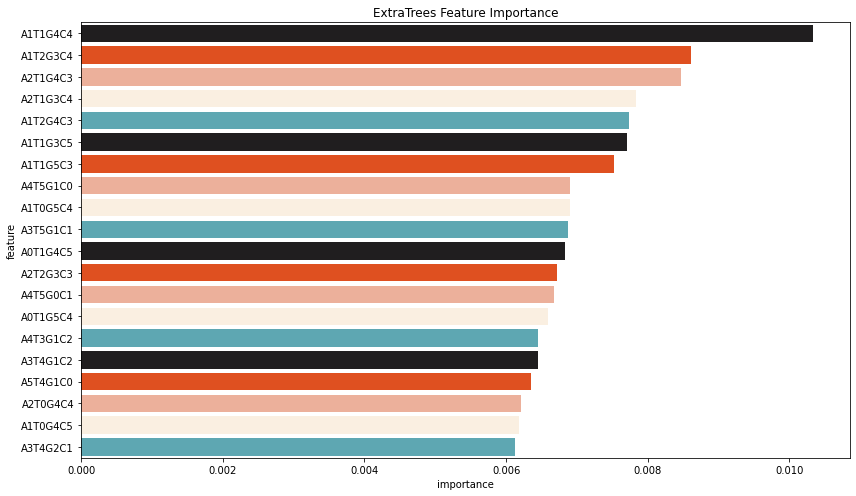

In [38]:
df_imp = pd.DataFrame({'feature': X_train.columns, 'importance': model3.feature_importances_})
plt.figure(figsize = (12,7))
sns.barplot(x="importance", y="feature", data = df_imp.sort_values(by ="importance", ascending = False).iloc[:20],
           palette = custom_colors)
plt.title("ExtraTrees Feature Importance")
plt.tight_layout()
plt.show()

In [39]:
sub1 = pd.DataFrame(y_pred3, columns =["target"])

In [43]:
submission = pd.concat([df_subm,sub1],axis = 1)
submission

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus
...,...,...
99995,299995,Streptococcus_pneumoniae
99996,299996,Bacteroides_fragilis
99997,299997,Bacteroides_fragilis
99998,299998,Bacteroides_fragilis


In [41]:
submission.to_csv("submission_etr.csv",index = False)

<h3 style="font-family: Arial;background-color:#9ef01a;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>If you found this notebook useful, please Upvote. Thanks!  </centre></strong></h3>